# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')

In [3]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Changing Column Name That give more relavant information 

In [4]:
df = df.rename(columns={'W': 'Wins', 'R': 'Runs_scored','AB':"At Bat",'H':'Hit','2B':'Two_Base_Hit','3B':'Three_Base_Hit'
                       ,'HR':'Home_Runs','BB':'Base_on_Balls','SO':'Strikeout','SB':'Stolen_Base','RA':'Run_average','ER':'Earned_run'
                       ,'ERA':'Earned_run_average','CG':'Complete_game','SHO':'Shutout','SV':'Save','E':'Error'})

df.head()

,Wins,Runs_scored,At Bat,Hit,Two_Base_Hit,Three_Base_Hit,Home_Runs,Base_on_Balls,Strikeout,Stolen_Base,Run_average,Earned_run,Earned_run_average,Complete_game,Shutout,Save,Error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.shape

(30, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs_scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hit                 30 non-null     int64  
 4   Two_Base_Hit        30 non-null     int64  
 5   Three_Base_Hit      30 non-null     int64  
 6   Home_Runs           30 non-null     int64  
 7   Base_on_Balls       30 non-null     int64  
 8   Strikeout           30 non-null     int64  
 9   Stolen_Base         30 non-null     int64  
 10  Run_average         30 non-null     int64  
 11  Earned_run          30 non-null     int64  
 12  Earned_run_average  30 non-null     float64
 13  Complete_game       30 non-null     int64  
 14  Shutout             30 non-null     int64  
 15  Save                30 non-null     int64  
 16  Error     

In [7]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [8]:
df.nunique()

Wins                  24
Runs_scored           28
At Bat                29
Hit                   29
Two_Base_Hit          22
Three_Base_Hit        23
Home_Runs             27
Base_on_Balls         29
Strikeout             29
Stolen_Base           27
Run_average           30
Earned_run            30
Earned_run_average    30
Complete_game          9
Shutout               12
Save                  20
Error                 21
dtype: int64

# Observation --
    1. There are 30 rows and 16 Columns in the dataset
    
    2. There are no null values
    
    3. There are no duplicates value into the dataset

In [10]:
df.describe()

,Wins,Runs_scored,At Bat,Hit,Two_Base_Hit,Three_Base_Hit,Home_Runs,Base_on_Balls,Strikeout,Stolen_Base,Run_average,Earned_run,Earned_run_average,Complete_game,Shutout,Save,Error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


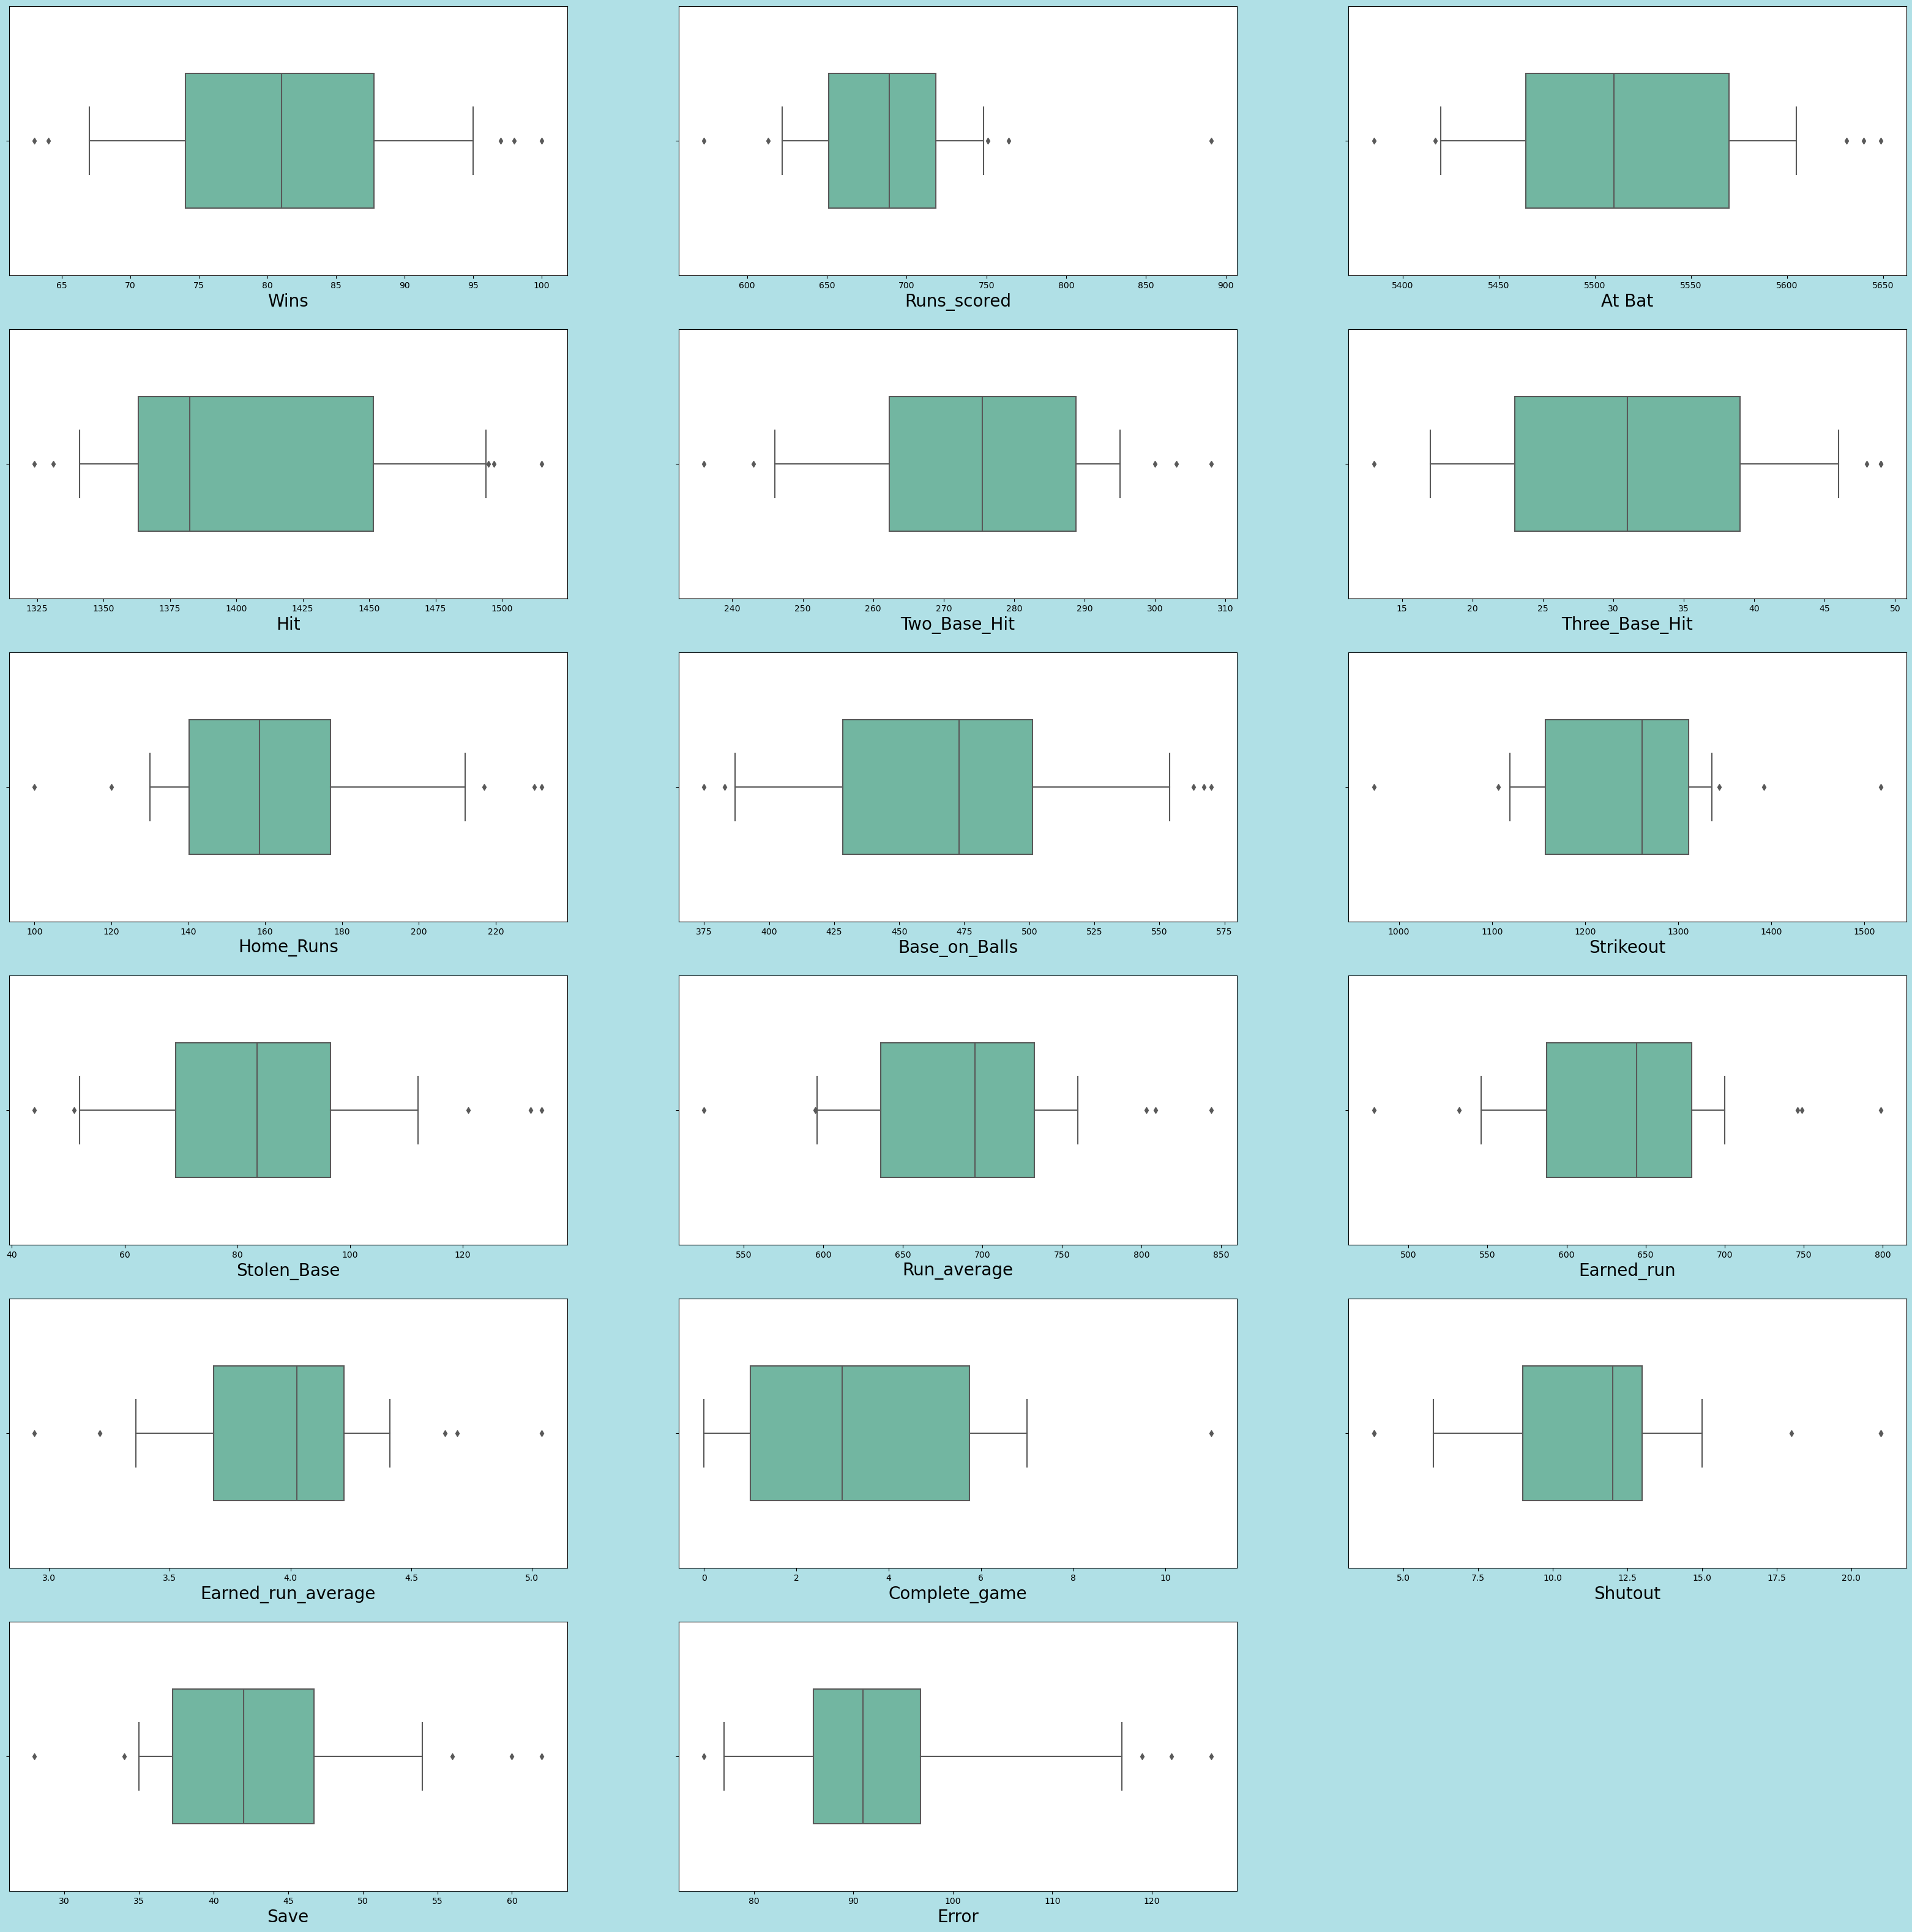

In [11]:
plt.figure(figsize=(40,40), facecolor='powderblue')
plotnumber = 1
for i, col in enumerate(df.columns):
    if plotnumber < 20:
        ax = plt.subplot(6, 3, plotnumber)
        sns.boxplot(data=df, x=col, palette="Set2", width=0.5, whis=(5,90))
        plt.xlabel(col, fontsize=20)
        plotnumber += 1
plt.show()

<Axes: >

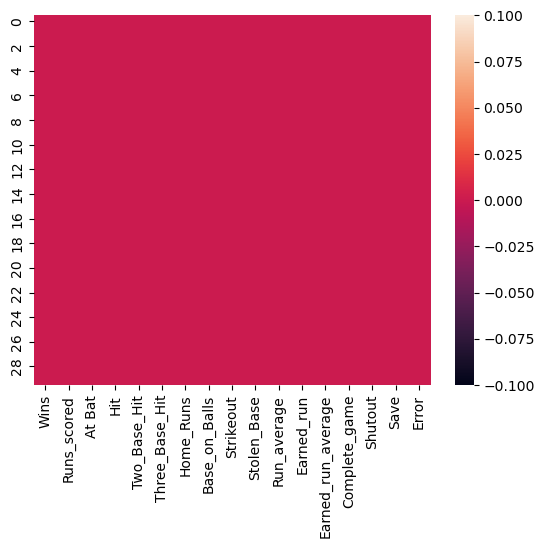

In [12]:
sns.heatmap(df.isnull())

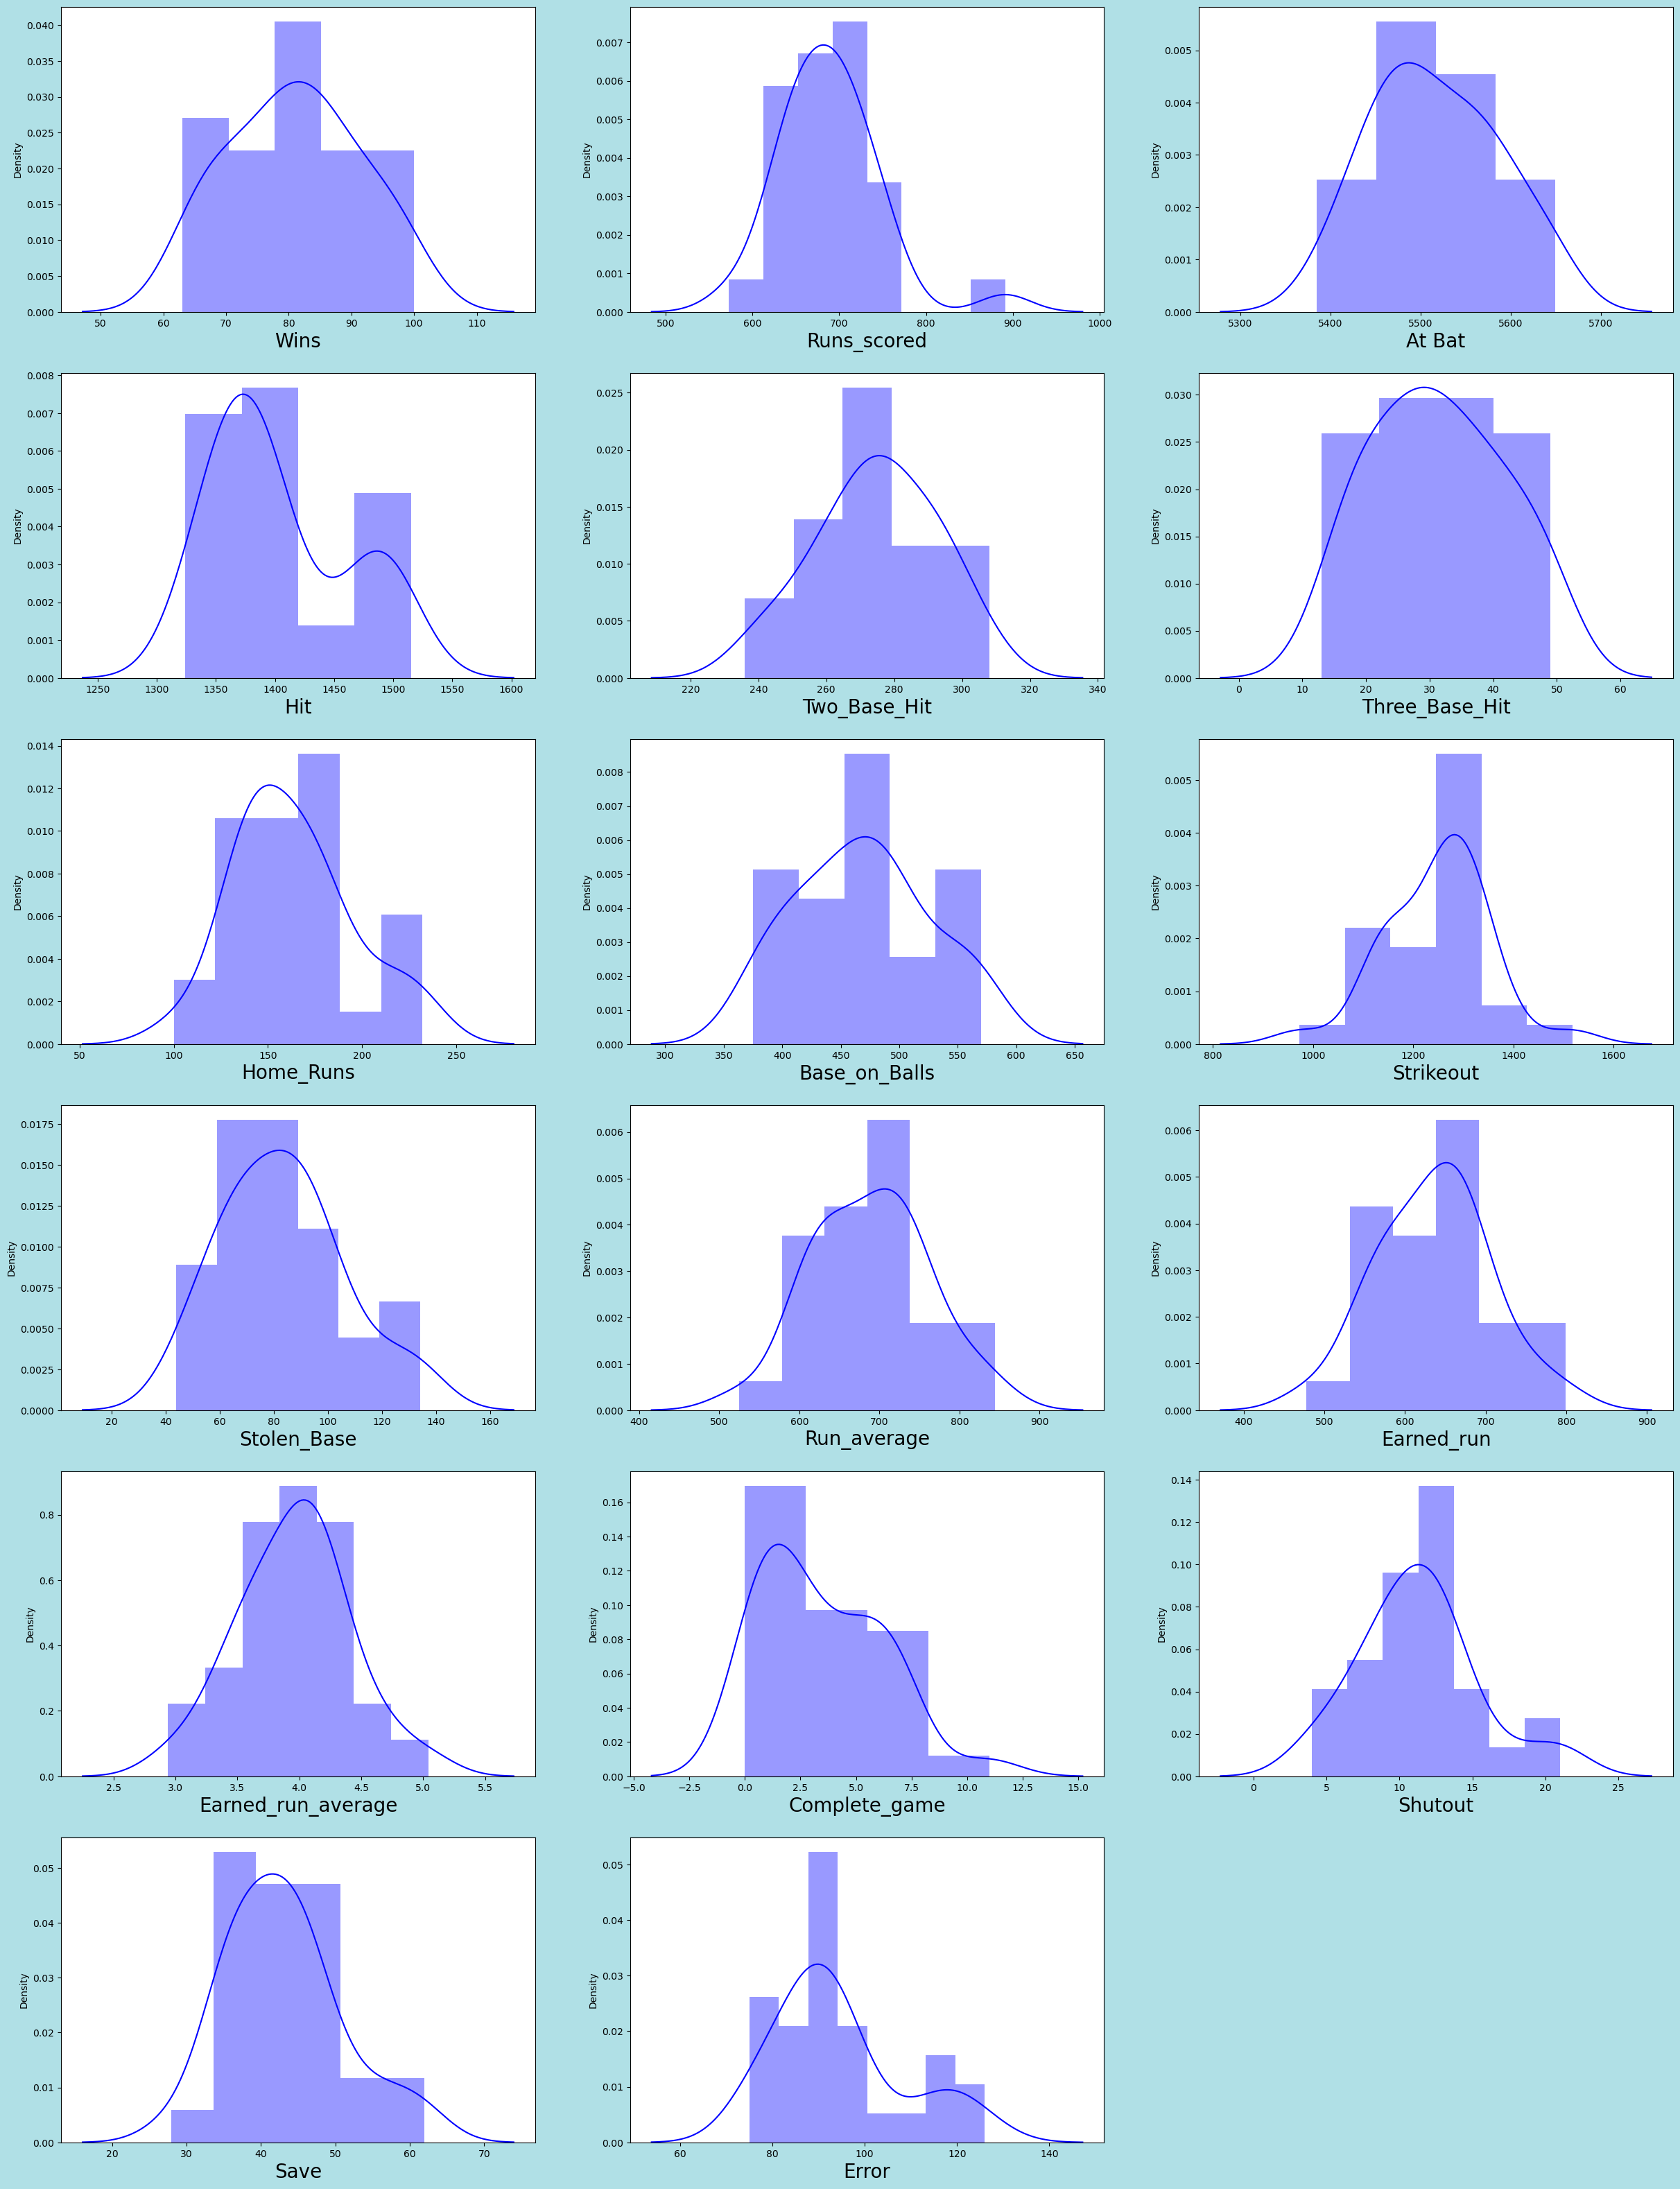

In [13]:
# CHECKING HOW DATA HAS BEEN DISTRIBUTED IN EACH COLUMNS
plt.figure(figsize=(30,40),facecolor='powderblue')
plotnumber=1

for column in df:
    if plotnumber<18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
df.skew()

Wins                  0.047089
Runs_scored           1.200786
At Bat                0.183437
Hit                   0.670254
Two_Base_Hit         -0.230650
Three_Base_Hit        0.129502
Home_Runs             0.516441
Base_on_Balls         0.158498
Strikeout            -0.156065
Stolen_Base           0.479893
Run_average           0.045734
Earned_run            0.058710
Earned_run_average    0.053331
Complete_game         0.736845
Shutout               0.565790
Save                  0.657524
Error                 0.890132
dtype: float64

In [15]:
df.corr()

,Wins,Runs_scored,At Bat,Hit,Two_Base_Hit,Three_Base_Hit,Home_Runs,Base_on_Balls,Strikeout,Stolen_Base,Run_average,Earned_run,Earned_run_average,Complete_game,Shutout,Save,Error
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs_scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hit,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Two_Base_Hit,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Three_Base_Hit,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home_Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base_on_Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeout,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


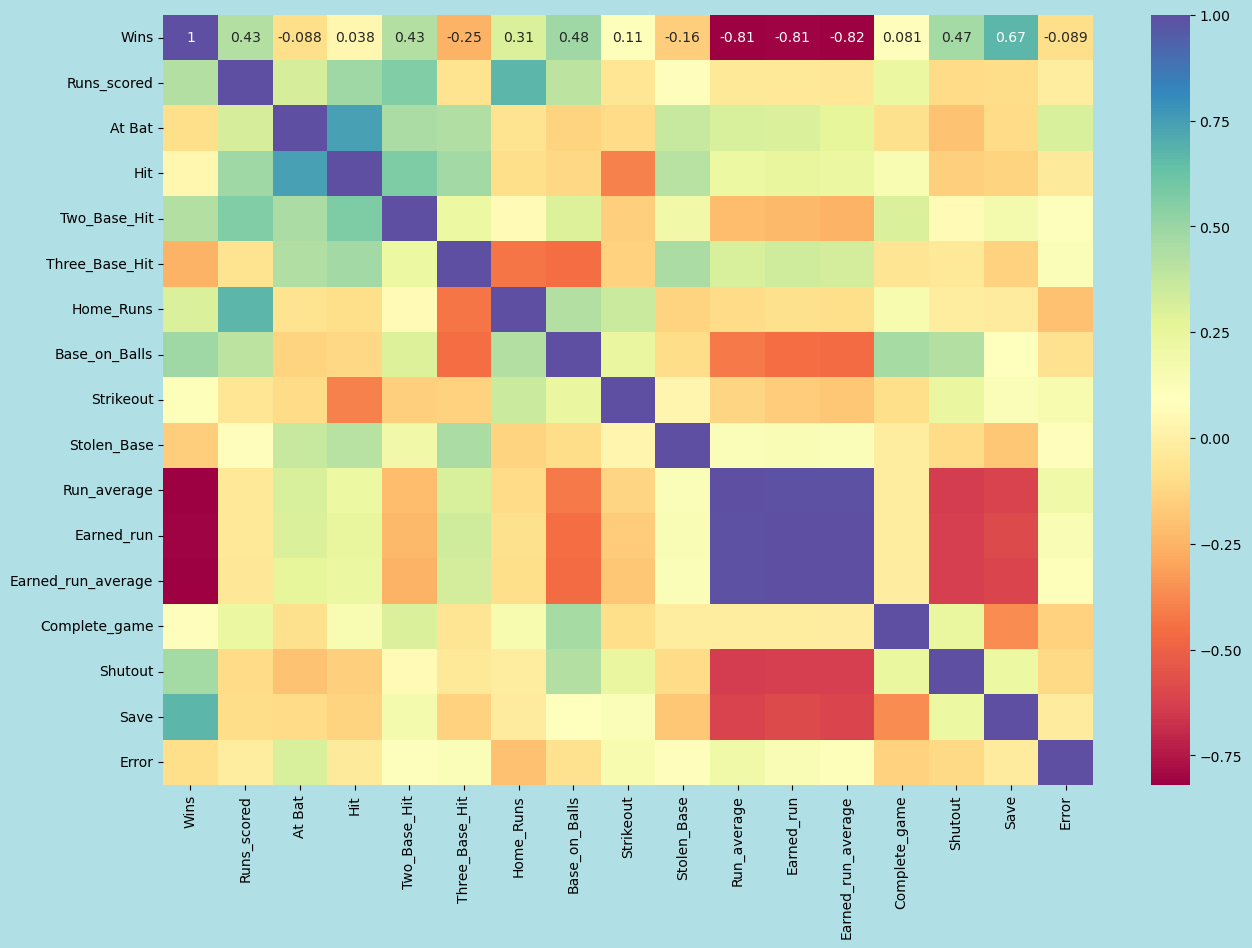

In [16]:
plt.figure(figsize=(15,10),facecolor='powderblue')
sns.heatmap(df.corr(),annot=True,cmap='Spectral')
plt.show()

In [17]:
df['Wins'].value_counts()

Wins
68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: count, dtype: int64

# Exploratory Data Analysis

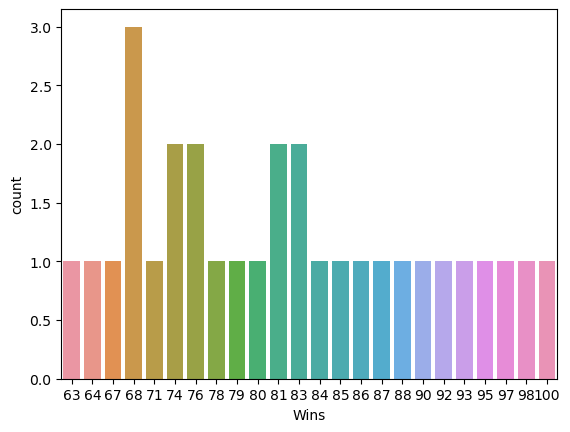

In [18]:
sns.countplot(x='Wins', data=df)
plt.show()

Dataset look underfitting and there is very less data to train the model.

# Seprating Dataset into X (Dependent Variable) and Y (Independent Variable) 

In [19]:
x=df.drop('Wins',axis=1)
y=df['Wins']

# Lets fit the Data by using Over_Sampling Method

In [20]:
from imblearn import under_sampling, over_sampling
from collections import Counter

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_resampled,y_resampled=ros.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(63, 3), (64, 3), (67, 3), (68, 3), (71, 3), (74, 3), (76, 3), (78, 3), (79, 3), (80, 3), (81, 3), (83, 3), (84, 3), (85, 3), (86, 3), (87, 3), (88, 3), (90, 3), (92, 3), (93, 3), (95, 3), (97, 3), (98, 3), (100, 3)] (72,)


In [22]:
y_resampled.head()

0    95
1    83
2    81
3    76
4    74
Name: Wins, dtype: int64

In [23]:
x_resampled.head()

,Runs_scored,At Bat,Hit,Two_Base_Hit,Three_Base_Hit,Home_Runs,Base_on_Balls,Strikeout,Stolen_Base,Run_average,Earned_run,Earned_run_average,Complete_game,Shutout,Save,Error
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [24]:
display('X_Resampled Shape',x_resampled.shape)
print('\n')
display('Y_Resampled Shape',y_resampled.shape)

'X_Resampled Shape'

(72, 16)

'Y_Resampled Shape'

(72,)

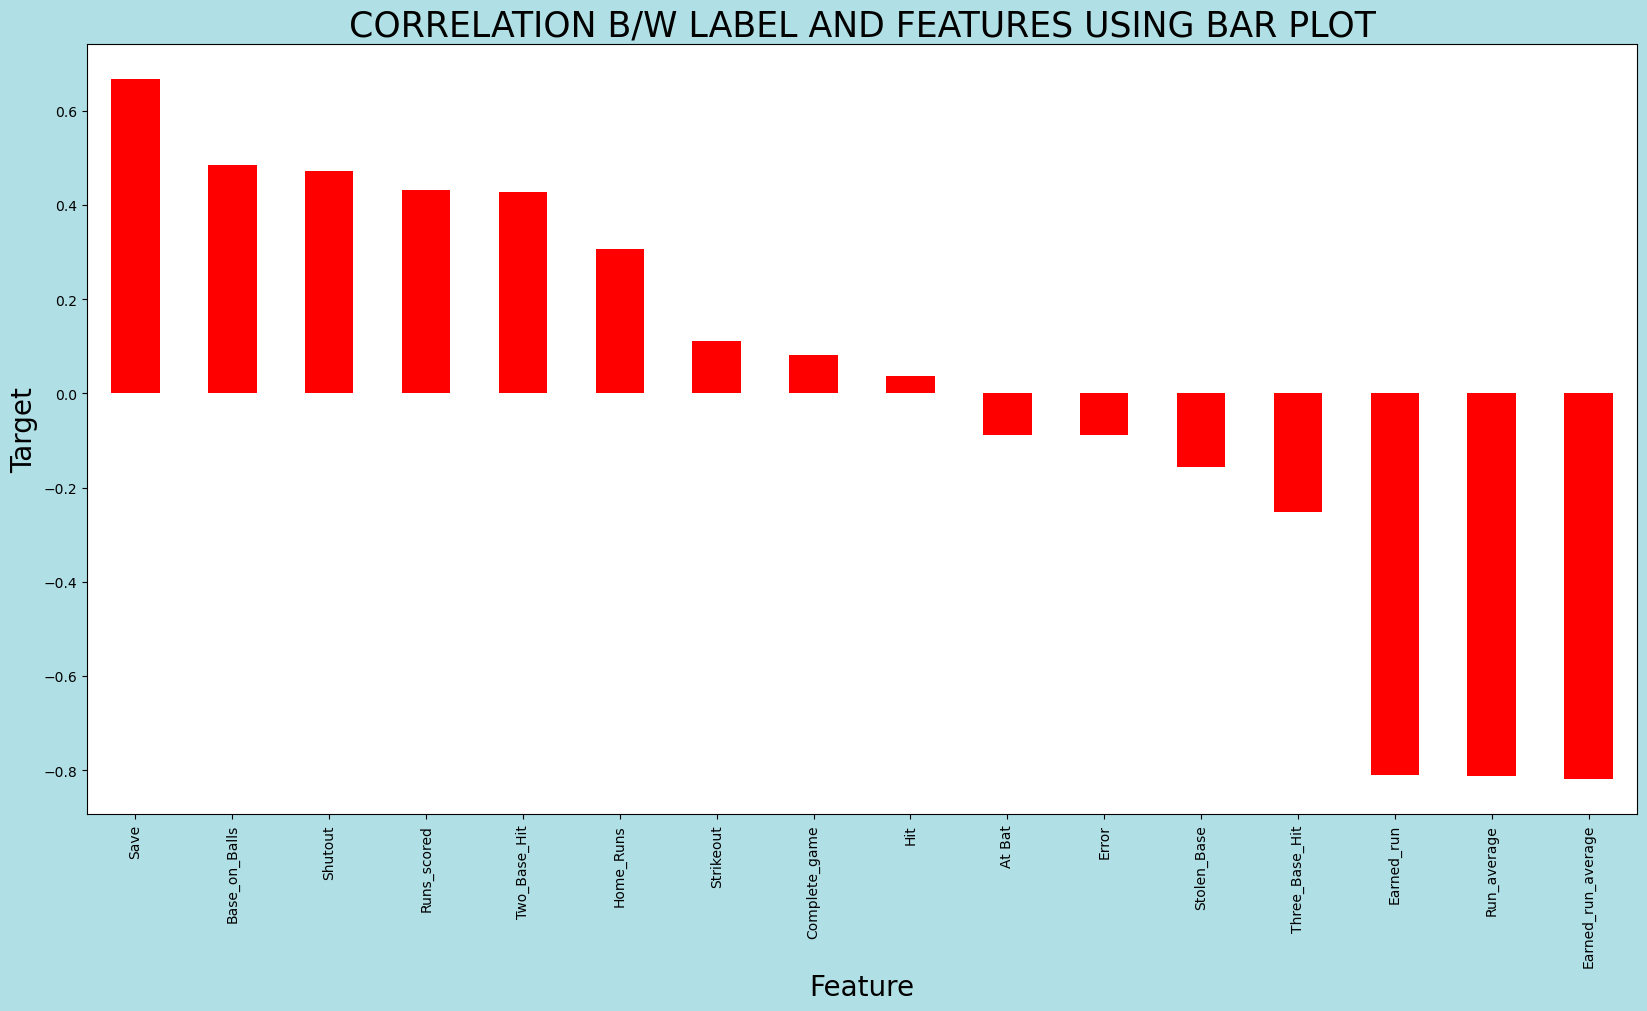

In [25]:
# VISUALIZING THE CORRELATION B/W LABEL AND FEATURES USING BAR PLOT

plt.figure(figsize=(20,10),facecolor='powderblue')
df.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('CORRELATION B/W LABEL AND FEATURES USING BAR PLOT',fontsize=25)
plt.show()

# Feature Engineering

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
st=StandardScaler()

In [29]:
x_scaled=pd.DataFrame(st.fit_transform(x_resampled),columns=x_resampled.columns)
x_scaled.head()

,Runs_scored,At Bat,Hit,Two_Base_Hit,Three_Base_Hit,Home_Runs,Base_on_Balls,Strikeout,Stolen_Base,Run_average,Earned_run,Earned_run_average,Complete_game,Shutout,Save,Error
0,0.536312,0.794744,1.581940,1.333114,1.144273,-0.775585,-1.603054,-2.528868,0.783955,-0.554750,-0.409907,-0.405000,-0.479159,-0.902774,1.486353,-0.427974
1,0.085998,-0.729283,-0.999949,0.088674,1.347700,-0.259372,-0.608514,0.178308,-0.645026,0.277081,0.348714,0.360591,-0.479159,0.071005,0.094874,-0.577195
2,-0.348234,-1.124401,-0.197470,1.495433,-0.177998,-0.714854,1.060892,-0.817114,0.027435,-0.568849,-0.657917,-0.540104,3.089749,-0.415885,-0.790613,-1.099469
3,-1.104119,0.202067,-0.441703,-0.831130,-0.381424,-0.866681,-1.230102,-0.128692,-0.729084,0.291180,0.202826,0.157934,1.503568,-0.659330,-0.917111,0.541963
4,-0.026581,1.218085,1.895953,0.737947,1.856266,-0.411199,-0.324360,0.131793,-0.098651,1.729262,1.705479,1.644080,1.503568,0.071005,-1.170108,-0.577195


# Checking Variance Inflation Factor to check which column is highly correated with Target Variable

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x_scaled.values,i) for i in range (len(x_scaled.columns))]
vif['features']=x_scaled.columns
vif

,VIF Values,features
0,14.084884,Runs_scored
1,14.375294,At Bat
2,10.896859,Hit
3,4.490058,Two_Base_Hit
4,3.380913,Three_Base_Hit
5,12.299650,Home_Runs
6,3.952227,Base_on_Balls
7,3.802227,Strikeout
8,2.200980,Stolen_Base
9,221.440302,Run_average


In [32]:
# Removing 'Earned Run' Column because it is highly correlated among all the columns
x_scaled.drop('Earned_run',axis=1,inplace=True)

In [33]:
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x_scaled.values,i) for i in range (len(x_scaled.columns))]
vif['features']=x_scaled.columns
vif

,VIF Values,features
0,13.363643,Runs_scored
1,5.950832,At Bat
2,10.554362,Hit
3,4.128009,Two_Base_Hit
4,3.311642,Three_Base_Hit
5,10.220944,Home_Runs
6,3.950574,Base_on_Balls
7,3.660791,Strikeout
8,1.998323,Stolen_Base
9,141.825456,Run_average


# Lets Build our model by using Machine Learning Algorithms

In [34]:
# IMPORTING MACHINE LEARNING LIBRARIES
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_resampled,test_size=0.30,random_state=39)

In [36]:
x_train.shape

(50, 15)

In [37]:
x_test.shape

(22, 15)

In [38]:
y_train.shape

(50,)

In [39]:
y_test.shape

(22,)

In [42]:
KNN=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
LR=LogisticRegression()
RFC=RandomForestClassifier()
GNB=GaussianNB()

model=[KNN,DTC,LR,RFC,GNB]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score -->",m,accuracy_score(y_test,predm))
    print('\n')

Accuracy Score --> KNeighborsClassifier() 0.09090909090909091


Accuracy Score --> DecisionTreeClassifier() 0.6818181818181818


Accuracy Score --> LogisticRegression() 0.6818181818181818


Accuracy Score --> RandomForestClassifier() 0.6818181818181818


Accuracy Score --> GaussianNB() 0.6818181818181818




# Checking Cross Validation Score to Verify our model which is best

In [43]:
from sklearn .model_selection import cross_val_score

In [44]:
# Cross-validation for KNN
scores = cross_val_score(KNN, x_train, y_train,cv=3)
print("Cross-validation scores --> KNN", scores)
print("Mean cross-validation score --> KNN", scores.mean())
print('\n')

# Cross-validation for Decision Tree
scores = cross_val_score(DTC, x_train, y_train,cv=3)
print("Cross-validation scores --> DTC", scores)
print("Mean cross-validation score --> DTC", scores.mean())
print('\n')


# Cross-validation for Logistic Regression
scores = cross_val_score(LR, x_train, y_train,cv=3)
print("Cross-validation scores --> LR", scores)
print("Mean cross-validation score --> LR", scores.mean())
print('\n')

# Cross-validation for Random Forest
scores = cross_val_score(RFC, x_train, y_train,cv=3)
print("Cross-validation scores --> RFC", scores)
print("Mean cross-validation score --> RFC", scores.mean())
print('\n')

# Cross-validation for GaussianNB
scores = cross_val_score(GNB, x_train, y_train,cv=3)
print("Cross-validation scores --> GNB", scores)
print("Mean cross-validation score --> GNB", scores.mean())
print('\n')

# Cross-validation for SVC
scores = cross_val_score(SVC, x_train, y_train,cv=3)
print("Cross-validation scores --> SVC", scores)
print("Mean cross-validation score --> SVC", scores.mean())
print('\n')

Cross-validation scores --> KNN [0.17647059 0.29411765 0.375     ]
Mean cross-validation score --> KNN 0.2818627450980392


Cross-validation scores --> DTC [0.88235294 0.94117647 0.9375    ]
Mean cross-validation score --> DTC 0.9203431372549019


Cross-validation scores --> LR [0.88235294 0.94117647 0.9375    ]
Mean cross-validation score --> LR 0.9203431372549019


Cross-validation scores --> RFC [0.82352941 0.94117647 0.9375    ]
Mean cross-validation score --> RFC 0.9007352941176471


Cross-validation scores --> GNB [0.88235294 0.94117647 0.9375    ]
Mean cross-validation score --> GNB 0.9203431372549019


Cross-validation scores --> SVC [0.82352941 0.82352941 0.875     ]
Mean cross-validation score --> SVC 0.8406862745098039




# HyperTuning our Model

In [45]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','sag','saga']
    }
]

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [47]:
grid_search = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,cv=3,scoring='f1_macro') 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_) 

LogisticRegression(C=0.0001, penalty='none')


In [48]:
model_grid = LogisticRegression(C=0.0001,
                               penalty='none',
                               solver='sag') 
model=model_grid.fit(x_train, y_train) 
y_pred_grid = model.predict(x_test) 
print("ACCURACY SCORE -->",accuracy_score(y_pred_grid,y_test))

ACCURACY SCORE --> 0.6818181818181818


# Lets save our Model by using Joblib Library

In [49]:
import joblib

In [50]:
joblib.dump(model_grid,'BaseballWin.pkl')

['BaseballWin.pkl']

In [51]:
model=joblib.load("BaseballWin.pkl")
prediction=model.predict(x_test)
prediction

array([ 88,  63, 100,  86,  97,  84,  85,  88,  71,  86,  71,  98,  92,
        84,  64,  85,  79,  85,  83,  95,  74,  67], dtype=int64)

In [52]:
joblib.dump(prediction,'BaseballWin2.pkl')

['BaseballWin2.pkl']

In [53]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=y_pred_grid
df["Original"]=a
df

,Predicted,Original
0,88,88
1,63,68
2,100,100
3,86,86
4,97,97
5,84,84
6,85,81
7,88,88
8,71,71
9,86,86


# THANKYOU